 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 7. Neural Network Improvements**
# Section 3. Various Activation Function

### _Objective_
1. Sigmoid 함수가 활성화 함수로 왜 부적절한지에 대해 배워보도록 하겠습니다. <br>
2. tanh, relu, leaky relu 등 다양한 활성화 함수에 대해 배워보도록 하겠습니다. <br>
  
╚═════════════════════════════════════════╝

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

<br><br>

# \[ 1. Sigmoid 함수와 Gradient Vanishing \]

----

----

> *Sigmoid 함수는 초기 딥러닝에서 가장 많이 쓰인 활성화 함수이지만, 현재는 거의 쓰이지 않습니다. 그 이유에 대해 알아보도록 하겠습니다.*<br>

<br>

## 1. Sigmoid 함수와 미분

---

In [14]:
xs = np.linspace(-10,10,101)

graph = tf.Graph()
with graph.as_default():
    input_ = tf.constant(xs, name='input')
    ys = tf.nn.sigmoid(input_, name='sigmoid')
    grad_ys = tf.gradients(ys, input_,name='gradient')[0]

### (1) sigmoid(x)의 시각화

시그모이드 함수를 그리면 아래와 같이 그려지게 됩니다.

$$
\sigma'(x) = \frac{1}{1+e^{-x}}
$$

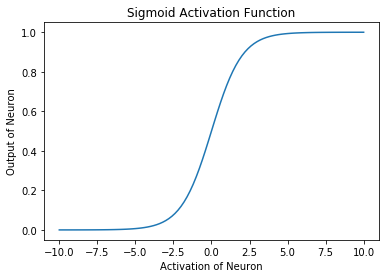

In [15]:
sess = tf.Session(graph=graph)
ys_value = sess.run(ys)

plt.plot(xs, ys_value)
plt.title("Sigmoid Activation Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

### (2) sigmoid(x)의 미분값 시각화

시그모이드 함수의 미분식은 아래와 같습니다.
$$
\sigma'(x) = \sigma(x)(1-\sigma(x))
$$

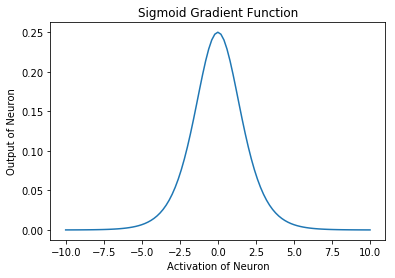

In [16]:
sess = tf.Session(graph=graph)
gradients = sess.run(grad_ys)

plt.plot(xs, gradients)
plt.title("Sigmoid Gradient Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

시그모이드 함수의 미분값은 항상 0.25보다 작습니다. 그렇기 때문에,<br>
역전파 과정중에서 시그모이드 함수를 거칠 때마다 빠르게 기울기가 소실하는<br>
Gradient Vanishing의 주된 원인이었습니다.

![Imgur](https://i.imgur.com/gnPA58T.png)

<br><br>

# \[ 2. 다양한 활성화 함수 \]

----

----

> *활성화 함수는 지금도 활발히 연구되고 있는 분야 중 하나입니다. 가장 많이 쓰이는
활성화 함수들을 위주로 살펴보도록 하겠습니다.*<br>

<br>
## 1. 하이퍼볼릭 탄젠트(tanh) 함수
---
* 하이퍼볼릭탄젠트는 시그모이드 함수의 크기와 위치를 조절한 함수입니다. <br>
* 이로 인해, Gradient의 크기가 시그모이드보다 4배 커집니다.

$$
tanh(x) = 2\sigma(2x)-1 \\
= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

In [17]:
xs = np.linspace(-10,10,101)

graph = tf.Graph()
with graph.as_default():
    input_ = tf.constant(xs, name='input')
    ys = tf.nn.tanh(input_, name='tanh')
    grad_ys = tf.gradients(ys, input_,name='gradient')[0]

### (1) tanh(x)의 시각화

하이퍼볼릭 탄젠트 함수를 그리면 아래와 같이 그려지게 됩니다.


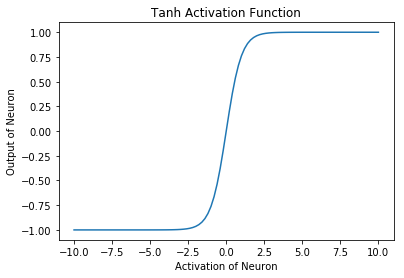

In [18]:
sess = tf.Session(graph=graph)
ys_value = sess.run(ys)

plt.plot(xs, ys_value)
plt.title("Tanh Activation Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

하이퍼볼릭 탄젠트는 0을 기준으로 대칭으로, 출력 값의 범위가 [-1,1]까지 입니다.

### (2) tanh(x)의 미분값 시각화

tanh 함수의 미분식은 아래와 같습니다.
$$
\tanh'(x) = 1 - tanh^2(x)
$$

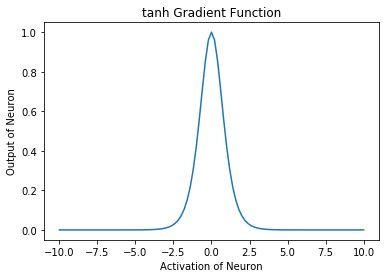

In [19]:
sess = tf.Session(graph=graph)
gradients = sess.run(grad_ys)

plt.plot(xs, gradients)
plt.title("tanh Gradient Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

tanh는 최대 기울기가 1로, 시그모이드보다 4배 가량 gradient의 크기가 큽니다.<br>
이로 인해, tanh는 sigmoid 대비 Vanishing Gradient 문제를 완화할 수 있습니다. <br>
하지만 -5 이하, 혹은 5 이상인 부분에서는 Sigmoid와 같이 기울기가 죽는 <br>
Saturation 지역이 있기 때문에 완전히 해결했다고 볼 수는 없습니다.

<br>
## 2. ReLU(Rectified Linear Unit) 함수
---
* Relu는 포화지역(Saturation Problem)이 없는 활성화 함수입니다. <br>

$$
relu(x) = max(x,0)
$$

In [24]:
xs = np.linspace(-10,10,101)

graph = tf.Graph()
with graph.as_default():
    input_ = tf.constant(xs, name='input')
    ys = tf.nn.relu(input_, name='relu')
    grad_ys = tf.gradients(ys, input_,name='gradient')[0]

### (1) relu(x)의 시각화

relu 함수를 그리면 아래와 같이 그려지게 됩니다.


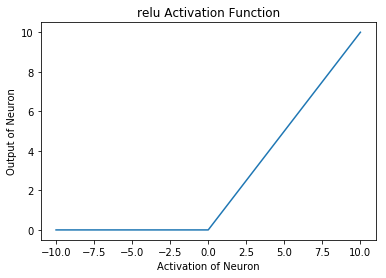

In [28]:
sess = tf.Session(graph=graph)
ys_value = sess.run(ys)

plt.plot(xs, ys_value)
plt.title("relu Activation Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

### (2) relu(x)의 미분값 시각화

relu는 0이상에서 Gradient 값이 1이고, 0이하에서는 gradient 값이 0이 됩니다.<br>

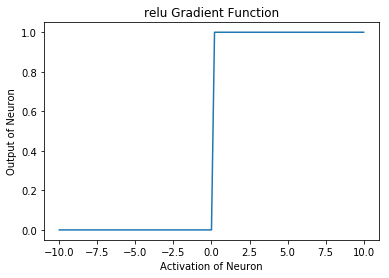

In [29]:
sess = tf.Session(graph=graph)
gradients = sess.run(grad_ys)

plt.plot(xs, gradients)
plt.title("relu Gradient Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

미분 값이 0이 되는 저 구간으로 인해, **Dying RELU**라 불리는 문제가 발생합니다.<br>
훈련하는 동안 일부 뉴런이 0 이외의 값을 출력하지 않는 현상으로, <br>
어떤 경우에는, 특히 큰 학습률을 사용하면 신경망의 뉴런 절반이 0만 반환하는 채로,<br>
즉 전혀 활성화되지 못한 채 죽는 현상이 발생합니다.

<br>
## 3. Leaky ReLU(Rectified Linear Unit) 함수
---
* leaky Relu는 Dying Relu 문제를 완화한 활성화 함수입니다. <br>

$$
\mbox{leakyrelu}(x) = max(x,\alpha x)
$$

보통 $\alpha$은 0.2로 둡니다.

In [31]:
xs = np.linspace(-10,10,101)

graph = tf.Graph()
with graph.as_default():
    input_ = tf.constant(xs, name='input')
    ys = tf.nn.leaky_relu(input_,alpha=0.2,name='leakyrelu')
    grad_ys = tf.gradients(ys, input_,name='gradient')[0]

### (1) leaky relu(x)의 시각화

leaky relu 함수를 그리면 아래와 같이 그려지게 됩니다.


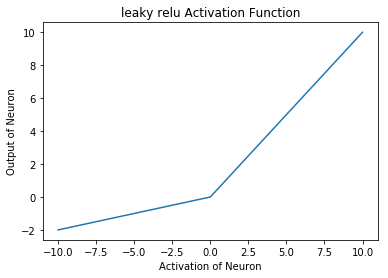

In [32]:
sess = tf.Session(graph=graph)
ys_value = sess.run(ys)

plt.plot(xs, ys_value)
plt.title("leaky relu Activation Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

### (2) leaky relu(x)의 미분값 시각화

leaky relu는 0이상에서 Gradient 값이 1이고, <br>
0이하에서는 gradient 값이 $\alpha$값이 됩니다.<br>

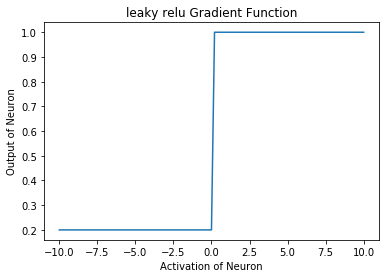

In [33]:
sess = tf.Session(graph=graph)
gradients = sess.run(grad_ys)

plt.plot(xs, gradients)
plt.title("leaky relu Gradient Function")
plt.xlabel("Activation of Neuron")
plt.ylabel("Output of Neuron")
plt.show()

leaky Relu에서는 0 이하이더라도 기울기 값이 0.2가 되기 때문에,<br>
활성화 값이 0 밑으로 떨어지더라도, 그 뉴런이 계속 학습할 수 있습니다.<br>
[최근 논문](https://arxiv.org/pdf/1505.00853.pdf)에서는 Leaky Relu가 항상<br>
relu보다 좀 더 나은 성능을 보인다고 소개된 바 있습니다.

## 4. 활성화 함수 비교
----

![Imgur](https://i.imgur.com/XPALpQ4.png)

* 지수 연산이 들어간 시그모이드함수와 tanh함수는 비교연산만 있는 relu에 비해 처리속도가 느립니다.<br>
* 출력 값의 크기가 정규화되어야 하는 상황에서 주로 sigmoid 함수 혹은 tanh 함수를 많이 쓰고, 그 외 학습을 빠르게 할 필요가 있는 상황에서는 RELU를 많이 이용합니다. 

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/04

---